In [8]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


# Simple Linear Regression

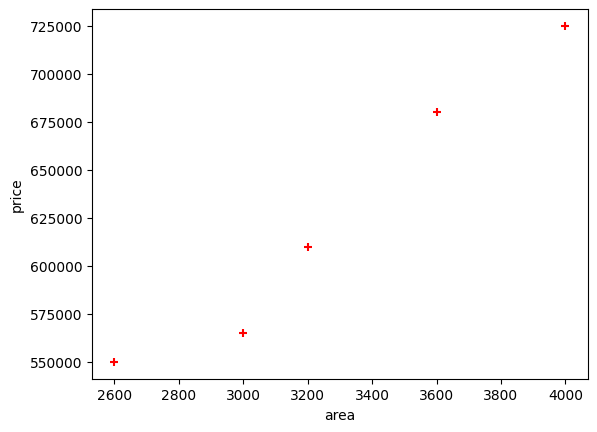

In [9]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

In [10]:
xvaluesdf = df.drop('price',axis='columns')
xvaluesdf



,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [11]:
yvaluesdf = df.price
yvaluesdf

,price
0,550000
1,565000
2,610000
3,680000
4,725000


In [45]:
# Create linear regression model object
reg = linear_model.LinearRegression()
reg.fit(xvaluesdf.values,yvaluesdf.values)

LinearRegression()

In [46]:
reg.predict([[3300]])

array([628715.75342466])

Remember the equation Y = m * X + b (m is coefficient and b is intercept)

In [17]:
reg.coef_

array([135.78767123])

In [18]:
reg.intercept_

np.float64(180616.43835616432)

Let us now predit the price of a house with 5000 sq feet

In [47]:
y=3300*135.78767123 + 180616.43835616432
y

628715.7534151643

In [21]:
reg.predict([[5000]])

array([859554.79452055])

Input file with area only and generate prediction file

In [22]:
area_df = pd.read_csv("areas.csv")
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [25]:
prices_df = reg.predict(area_df.values)
prices_df

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

Combine to one dataframe


In [26]:
area_df['prices']= prices_df
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [27]:
area_df.to_csv('prediction.csv')

# Multi-variate Linear Regression

In [28]:
dfm = pd.read_csv('homeprices-m.csv')
dfm

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [30]:
dfm.bedrooms.median()

4.0

In [32]:
dfm.bedrooms = dfm.bedrooms.fillna(dfm.bedrooms.median())
dfm

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [33]:
xvaluesdfm = dfm.drop('price',axis='columns')
xvaluesdfm


,area,bedrooms,age
0,2600,3.0,20
1,3000,4.0,15
2,3200,4.0,18
3,3600,3.0,30
4,4000,5.0,8
5,4100,6.0,8


In [34]:
mreg = linear_model.LinearRegression()
mreg.fit(xvaluesdfm.values,dfm.price.values)

LinearRegression()

In [36]:
mreg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [37]:
mreg.intercept_

np.float64(221323.00186540396)

Find price of home with 3000 sqr ft area, 3 bedrooms, 40 year old

In [40]:
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.00186540384

498408.25157402386

In [41]:
mreg.predict([[3000, 3, 40]])

array([498408.25158031])